# Pairwise FST and genetic diversity in *Ostrea lurida*
This notebook details how I calculated and plotted pairwise FST, as well as the genetic diversity within populations and within regions. I do this for the full combined dataset, then again for the outlier and neutral datasets.

In [1]:
library("adegenet") #For storing genotype data
library(hierfstat) #For calculating pairwise Fst
library(ggplot2) #For plotting
library(reshape2) #For plotting
library(plyr)
library("poppr")

Loading required package: ade4

   /// adegenet 2.1.1 is loaded ////////////

   > overview: '?adegenet'
   > tutorials/doc/questions: 'adegenetWeb()' 
   > bug reports/feature requests: adegenetIssues()



Attaching package: ‘hierfstat’

The following object is masked from ‘package:adegenet’:

    read.fstat

This is poppr version 2.8.0. To get started, type package?poppr
OMP parallel support: available


## Combined
Load previously created Adegenet genind object and hierfstat object, made using radiator from a .vcf file.

In [4]:
load("../Inputs/OL-c85t8-m80x50-maf025-filt.hf")
load("../Inputs/OL-c85t8-m80x50-maf025-filt.genind")

In [5]:
#The order we want the populations to be when plotting (North to South). 
pop_order <- c("Klaskino","Barkeley_Sound","Ladysmith","Victoria","Discovery_Bay","Liberty_Bay","North_Bay","Triton_Cove","Willapa","Netarts","Yaquina","Coos","Humboldt","Tomales","San_Francisco","Elkhorn_Slough","Mugu_Lagoon","San_Diego")

### Pairwise Fst

In [6]:
#fst.mat <- pairwise.fst(stratted.filt)
fst.mat <- genet.dist(hf.filt, method = "WC84")

In [7]:
gindF.fst.mat.tri <- as.matrix(fst.mat)
colnames(gindF.fst.mat.tri) <- pop_order
rownames(gindF.fst.mat.tri) <- pop_order
write.table(gindF.fst.mat.tri, file="OL-m80x55-maf025-Pop.pwfst",row.names = T,col.names = T)

melted <- melt(gindF.fst.mat.tri, na.rm =TRUE)

In [8]:
gindF.fst.mat.tri

,Klaskino,Barkeley_Sound,Ladysmith,Victoria,Discovery_Bay,Liberty_Bay,North_Bay,Triton_Cove,Willapa,Netarts,Yaquina,Coos,Humboldt,Tomales,San_Francisco,Elkhorn_Slough,Mugu_Lagoon,San_Diego
Klaskino,0.00000000,0.03812685,0.06494684,0.12166042,0.08624457,0.100057324,0.101064197,0.08258362,1.294463e-01,0.08937476,0.12395170,1.197512e-01,0.10938321,0.12254371,0.14212400,0.13774614,0.148876814,0.156684061
Barkeley_Sound,0.03812685,0.00000000,0.06088162,0.12978186,0.08430142,0.100569510,0.103744921,0.08061552,1.342007e-01,0.09694274,0.13781893,1.266610e-01,0.10303207,0.12172448,0.13833499,0.12841215,0.136489305,0.147262832
Ladysmith,0.06494684,0.06088162,0.00000000,0.08501567,0.05309786,0.061824988,0.069480872,0.03457616,1.286797e-01,0.08927998,0.13121132,1.224357e-01,0.09530331,0.11636672,0.13253858,0.13072785,0.139153247,0.146402274
Victoria,0.12166042,0.12978186,0.08501567,0.00000000,0.06172567,0.088168356,0.095259004,0.08529925,1.399048e-01,0.11541057,0.15138345,1.351783e-01,0.12821585,0.15770240,0.17447249,0.17239714,0.181813644,0.190903577
Discovery_Bay,0.08624457,0.08430142,0.05309786,0.06172567,0.00000000,0.017696202,0.019570608,0.02694331,1.062195e-01,0.07716103,0.12258330,1.030842e-01,0.08621569,0.11957619,0.13565075,0.12843236,0.140845594,0.146180790
Liberty_Bay,0.10005732,0.10056951,0.06182499,0.08816836,0.01769620,0.000000000,0.006400404,0.04939036,1.320149e-01,0.09251391,0.14292050,1.254430e-01,0.09778613,0.14446054,0.15833631,0.15689059,0.163714252,0.172413157
North_Bay,0.10106420,0.10374492,0.06948087,0.09525900,0.01957061,0.006400404,0.000000000,0.04832823,1.285497e-01,0.08724631,0.14171119,1.259654e-01,0.09381876,0.14241626,0.15928401,0.15477878,0.161806189,0.168340822
Triton_Cove,0.08258362,0.08061552,0.03457616,0.08529925,0.02694331,0.049390356,0.048328232,0.00000000,1.195733e-01,0.09007664,0.13236769,1.151677e-01,0.10203276,0.13014110,0.14681243,0.14670059,0.156169822,0.162831150
Willapa,0.12944630,0.13420075,0.12867967,0.13990484,0.10621954,0.132014899,0.128549683,0.11957334,0.000000e+00,0.06930253,0.09385743,-3.396989e-05,0.10588486,0.13412054,0.14606617,0.14526285,0.157525434,0.166711779
Netarts,0.08937476,0.09694274,0.08927998,0.11541057,0.07716103,0.092513910,0.087246306,0.09007664,6.930253e-02,0.00000000,0.02675295,6.886089e-02,0.07757484,0.10006175,0.11443713,0.11182578,0.131871944,0.138829075


In [9]:
#Average pairwise Fst
summary(melted$value)

      Min.    1st Qu.     Median       Mean    3rd Qu.       Max. 
-3.397e-05  7.716e-02  1.159e-01  1.032e-01  1.388e-01  1.909e-01 

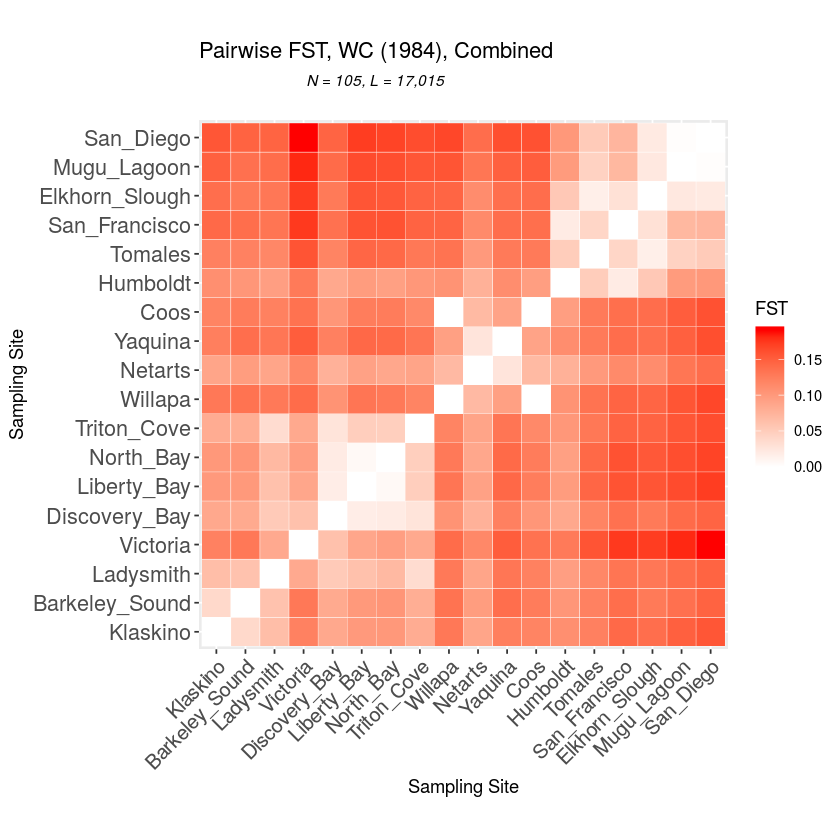

In [11]:
par(mfrow=c(2,1))
ggplot(data = melted, aes(Var2, Var1, fill = value))+ geom_tile(color = "white")+ 
  scale_fill_gradient(low = "white", high = "red", name="FST")  +
  ggtitle(expression(atop("Pairwise FST, WC (1984), Combined", atop(italic("N = 105, L = 17,015"), ""))))+
  labs( x = "Sampling Site", y = "Sampling Site") + 
  theme(axis.text.x = element_text(angle = 45, vjust = 1, size = 12, hjust = 1),axis.text.y = element_text(size = 13)) + 
  coord_fixed()

#### Regions

In [17]:
hf.reg <- hf.filt
regions <- c("NW_BC","NW_BC",rep("Puget+BC",6),"Willapa_Coos","Oregon","Oregon","Willapa_Coos",rep("NoCal",3),rep("SoCal",3))
hf.reg$POP_ID <- mapvalues(hf.reg$POP_ID, from =c(1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18), to = regions)

In [8]:
#fst.mat <- pairwise.fst(stratted.filt)
fst.mat.reg <- genet.dist(hf.reg, method = "WC84")

In [15]:
fst.mat.reg

                  NoCal      NW_BC     Oregon   Puget+BC      SoCal
NW_BC        0.09530460                                            
Oregon       0.08576601 0.09451799                                 
Puget+BC     0.09568923 0.06435994 0.08862757                      
SoCal        0.05151527 0.12908651 0.12548427 0.14682707           
Willapa_Coos 0.10362400 0.11713546 0.07495828 0.09950112 0.14633049

In [17]:
NS <- c("NW_BC","Puget+BC","Willapa_Coos","Oregon","NoCal","SoCal")
gindF.fst.mat.tri <- as.matrix(fst.mat.reg)
gindF.fst.mat.tri <- gindF.fst.mat.tri[NS,NS]

In [18]:
write.table(gindF.fst.mat.tri, file="OL-m80x55-maf025-Reg.pwfst",row.names = T,col.names = T)

gindF.fst.mat.tri[lower.tri(fst.mat.reg, diag=TRUE)] <- NA
melted <- melt(gindF.fst.mat.tri, na.rm =TRUE)

In [19]:
gindF.fst.mat.tri

,NW_BC,Puget+BC,Willapa_Coos,Oregon,NoCal,SoCal
NW_BC,NA,0.06435994,0.11713546,0.09451799,0.09530460,0.12908651
Puget+BC,NA,NA,0.09950112,0.08862757,0.09568923,0.14682707
Willapa_Coos,NA,NA,NA,0.07495828,0.10362400,0.14633049
Oregon,NA,NA,NA,NA,0.08576601,0.12548427
NoCal,NA,NA,NA,NA,NA,0.05151527
SoCal,NA,NA,NA,NA,NA,NA


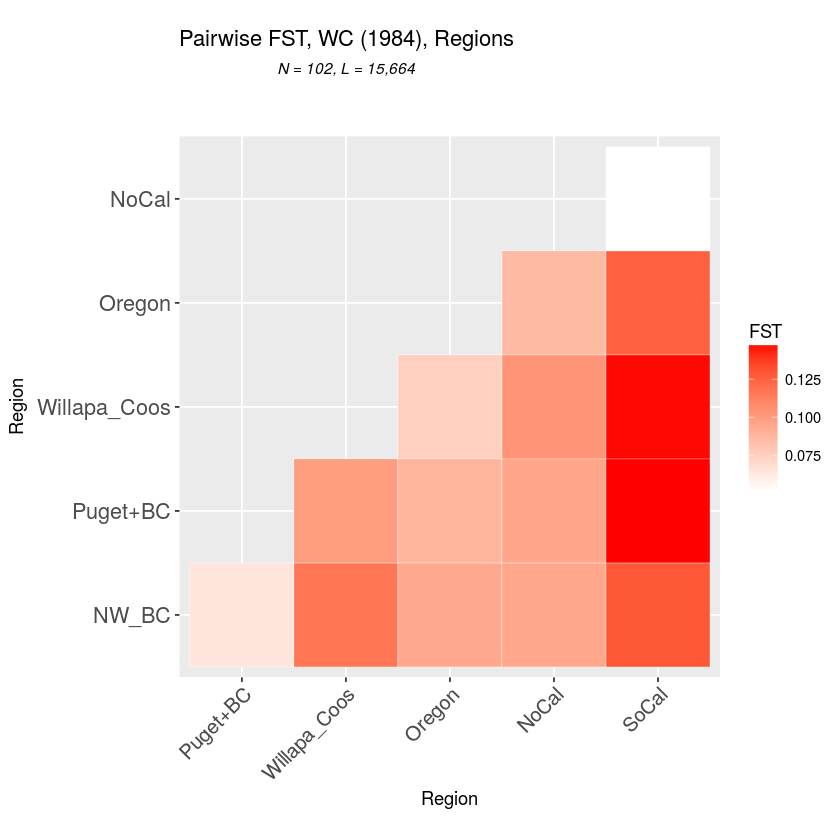

In [20]:
par(mfrow=c(2,1))
ggplot(data = melted, aes(Var2, Var1, fill = value))+ geom_tile(color = "white")+ 
  scale_fill_gradient(low = "white", high = "red", name="FST")  +
  ggtitle(expression(atop("Pairwise FST, WC (1984), Regions", atop(italic("N = 102, L = 15,664"), ""))))+
  labs( x = "Region", y = "Region") + 
  theme(axis.text.x = element_text(angle = 45, vjust = 1, size = 12, hjust = 1),axis.text.y = element_text(size = 13)) + 
  coord_fixed()

### Genetic diversity (observed and expected heterozygosity)

In [121]:
#All populations
comb <- summary(stratted.filt)
names(comb)

[1] "n"         "n.by.pop"  "loc.n.all" "pop.n.all" "NA.perc"   "Hobs"     
[7] "Hexp"

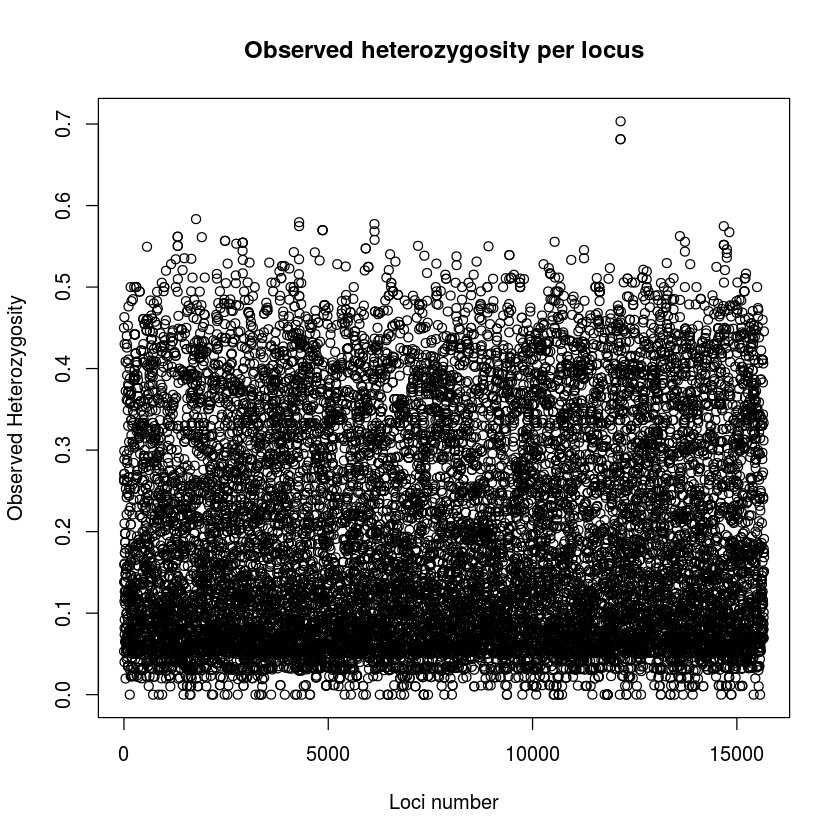

In [122]:
plot(comb$Hobs, xlab="Loci number", ylab="Observed Heterozygosity", 
     main="Observed heterozygosity per locus")

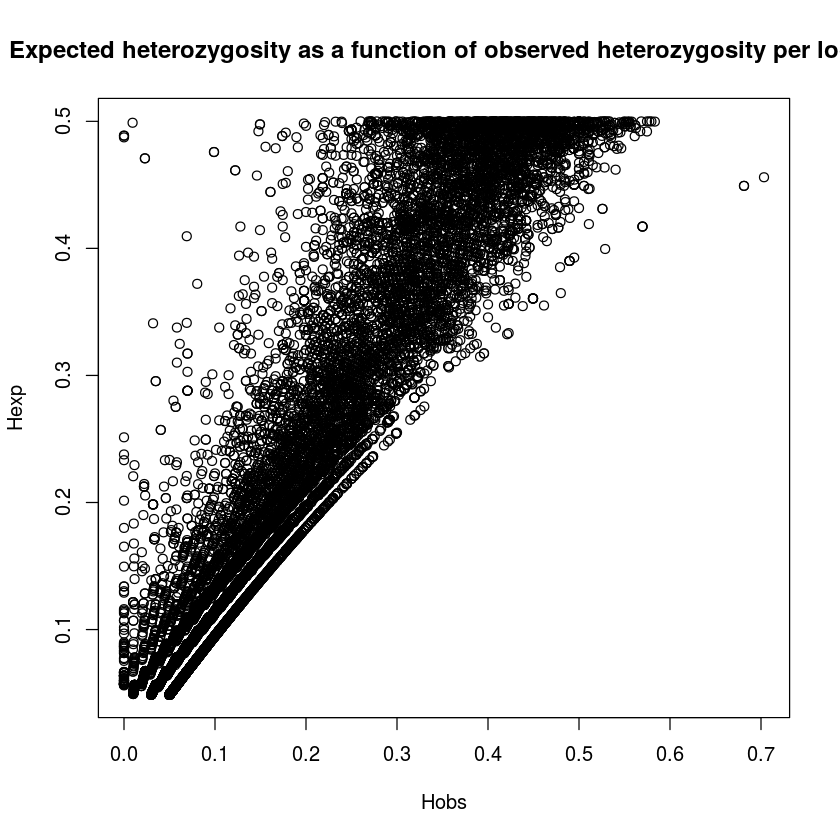

In [123]:
plot(comb$Hobs,comb$Hexp, xlab="Hobs", ylab="Hexp", 
     main="Expected heterozygosity as a function of observed heterozygosity per locus")

In [124]:
bartlett.test(list(comb$Hexp, comb$Hobs)) # a test : H0: Hexp = Hobs


	Bartlett test of homogeneity of variances

data:  list(comb$Hexp, comb$Hobs)
Bartlett's K-squared = 264.04, df = 1, p-value < 2.2e-16


Significant difference between observed and expected heterozygosity

In [79]:
library(pegas)
hw <- hw.test(stratted.filt, B = 200)

In [ ]:
done = []
hwe_mat = matrix(nrow = 18,ncol=2)
i = 1
for(pop in pop(stratted.filt)){
    if(pop !%in% done){
        hwe <- hw.test(stratted.filt[which(pop(stratted.filt)==pop),drop = TRUE],B=500)
        hwe_mat[2,j] = nrow(hwe[which(hwe[,3]< 0.01),])
        hwe_mat[1,j] = pop
        i <- i+ 1
        done = c(done, pop)
    }
}

In [5]:
basicstat <- basic.stats(hf.filt, diploid = TRUE, digits = 2) 

In [72]:
names(basicstat)

[1] "n.ind.samp" "pop.freq"   "Ho"         "Hs"         "Fis"       
[6] "perloc"     "overall"

In [35]:
as.data.frame(basicstat$overall)

,basicstat$overall
Ho,0.19
Hs,0.21
Ht,0.23
Dst,0.02
Htp,0.24
Dstp,0.03
Fst,0.11
Fstp,0.11
Fis,0.07
Dest,0.03


In [8]:
boot <- boot.ppfis(hf.filt,nboot = 500)

In [9]:
colnames(basicstat$Ho) <- pop_order
Ho <- colMeans(basicstat$Ho,na.rm = T)
colnames(basicstat$Hs) <- pop_order
He <- colMeans(basicstat$Hs,na.rm = T)
colnames(basicstat$Fis) <- pop_order
Fis<- colMeans(basicstat$Fis,na.rm = T) 
cbind(Ho,He,Fis, boot$fis.ci)

,Ho,He,Fis,ll,hl
Klaskino,0.1838745,0.1973583,0.050780329,0.0621,0.0782
Barkeley_Sound,0.1752302,0.1905404,0.037485022,0.0666,0.0919
Ladysmith,0.1977528,0.1951686,-0.026230080,-0.0249,-0.0035
Victoria,0.1710198,0.1812063,0.036248480,0.0473,0.0675
Discovery_Bay,0.1788783,0.1924741,0.024090270,0.0569,0.0820
Liberty_Bay,0.1776339,0.1860797,0.028089065,0.0355,0.0552
North_Bay,0.1739607,0.1852523,0.030083882,0.0494,0.0722
Triton_Cove,0.1772185,0.1906301,0.045507911,0.0625,0.0811
Willapa,0.1769197,0.1895767,0.036952940,0.0552,0.0770
Netarts,0.1901156,0.2065636,0.050314431,0.0690,0.0904


#### Regions

In [23]:
#Regions
reg.filt <- stratted.filt
pop(reg.filt) <- mapvalues(pop(reg.filt), from =pop_order, to = regions)

Significant difference between observed and expected heterozygosity

In [115]:
hw <- hw.test(hf.reg, B = 1000)

ERROR: Error in UseMethod("hw.test"): no applicable method for 'hw.test' applied to an object of class "data.frame"


In [18]:
basicstat <- basic.stats(hf.reg, diploid = TRUE, digits = 2) 

In [37]:
as.data.frame(basicstat$overall)

,basicstat$overall
Ho,0.19
Hs,0.21
Ht,0.24
Dst,0.02
Htp,0.24
Dstp,0.02
Fst,0.09
Fstp,0.10
Fis,0.10
Dest,0.03


In [19]:
boot <- boot.ppfis(hf.reg,nboot = 500)

In [21]:
Ho <- colMeans(basicstat$Ho,na.rm = T)
He <- colMeans(basicstat$Hs,na.rm = T)
Fis<- colMeans(basicstat$Fis,na.rm = T) 
x <- cbind(Ho,He,Fis, boot$fis.ci)
NS <- c("NW_BC","Puget+BC","Willapa_Coos","Oregon","NoCal","SoCal")
x[NS,]

,Ho,He,Fis,ll,hl
NW_BC,0.1807418,0.1993903,0.07128108,0.0851,0.0977
Puget+BC,0.1783293,0.1973544,0.08191545,0.0904,0.0995
Willapa_Coos,0.1767856,0.1902586,0.05211503,0.0614,0.0763
Oregon,0.1906161,0.2049923,0.05201669,0.0606,0.0757
NoCal,0.2114492,0.2370474,0.08380897,0.0994,0.1119
SoCal,0.2248481,0.2592403,0.11530984,0.1275,0.1385


## Neutral

Load previously created Adegenet genind objects, made using radiator from a .vcf file.

In [164]:
load("../Inputs/OL-final-c85-t88-Breps-m80x55-maf025-neutI2-filt.hf")
load("../Inputs/OL-final-c85-t88-Breps-m80x55-maf025-neutI2-filt.genind")

### Pairwise Fst

In [80]:
#gindF.fst.mat.tri <- as.matrix(read.table("OL-m80x55-maf025-neutI2-Pop.pwfst"))
#gindF.fst.mat.tri[lower.tri(as.dist(gindF.fst.mat.tri), diag=TRUE)] <- NA
#melted <- melt(gindF.fst.mat.tri, na.rm =TRUE)

In [ ]:
#fst.mat <- pairwise.fst(stratted.filt)
fst.mat.N <- genet.dist(hf.filt, method = "WC84")

In [ ]:
gindF.fst.mat.tri <- as.matrix(fst.mat.N)
colnames(gindF.fst.mat.tri) <- pop_order
rownames(gindF.fst.mat.tri) <- pop_order
write.table(gindF.fst.mat.tri, file="OL-m80x55-maf025-neutI2-Pop.pwfst",row.names = T,col.names = T)

#gindF.fst.mat.tri[lower.tri(fst.mat.N, diag=TRUE)] <- NA
melted <- melt(gindF.fst.mat.tri, na.rm =TRUE)

In [59]:
summary(melted$value)

      Min.    1st Qu.     Median       Mean    3rd Qu.       Max. 
-0.0004992  0.0832245  0.1146951  0.1038352  0.1321499  0.1766781 

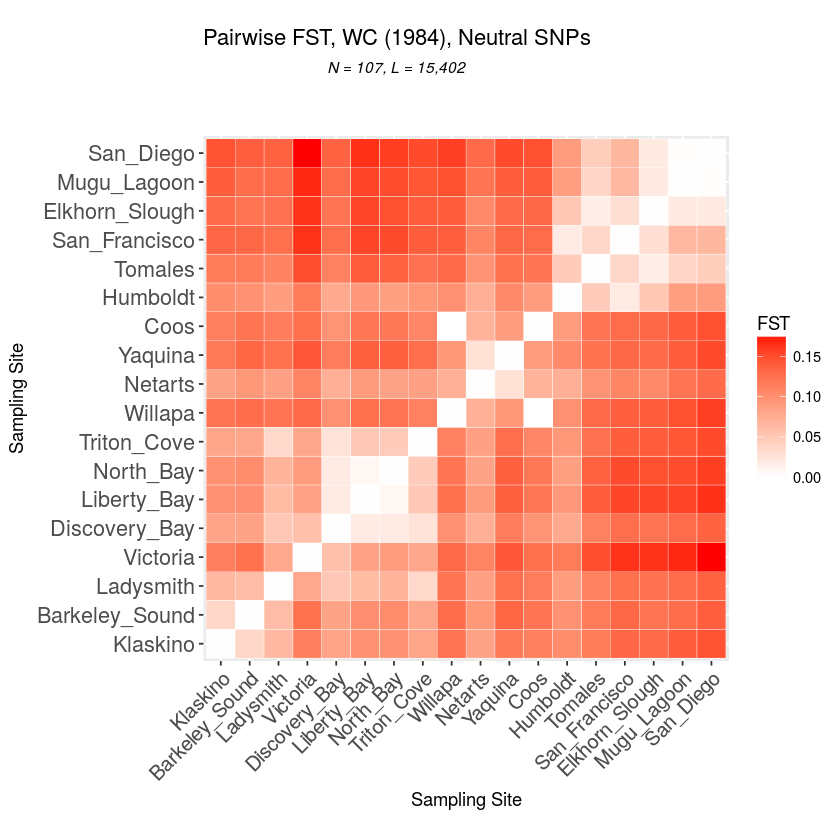

In [81]:
par(mfrow=c(2,1))
ggplot(data = melted, aes(Var2, Var1, fill = value))+ geom_tile(color = "white")+ 
  scale_fill_gradient(low = "white", high = "red", name="FST")  +
  ggtitle(expression(atop("Pairwise FST, WC (1984), Neutral SNPs", atop(italic("N = 107, L = 15,402"), ""))))+
  labs( x = "Sampling Site", y = "Sampling Site") + 
  theme(axis.text.x = element_text(angle = 45, vjust = 1, size = 12, hjust = 1),axis.text.y = element_text(size = 13)) + 
  coord_fixed()

#### Regions

In [181]:
hf.reg <- hf.filt
regions <- c("NW_BC","NW_BC","Ladysmith",rep("Puget+BC",5),"Willapa_Coos","Oregon","Oregon","Willapa_Coos",rep("NoCal",4),rep("SoCal",2))
hf.reg$POP_ID <- mapvalues(hf.reg$POP_ID, from =c(1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18), to = regions)

In [175]:
#fst.mat <- pairwise.fst(stratted.filt)
fst.mat.reg.N <- genet.dist(hf.reg, method = "WC84")

In [143]:
fst.mat.reg.N

                  NoCal      NW_BC     Oregon   Puget+BC      SoCal
NW_BC        0.08940866                                            
Oregon       0.08147845 0.09051028                                 
Puget+BC     0.09313416 0.06297522 0.08436397                      
SoCal        0.04638971 0.13221208 0.13000837 0.14805576           
Willapa_Coos 0.09947742 0.11252876 0.07417108 0.09441284 0.15028959

In [177]:
NS <- c("NW_BC","Ladysmith","Puget+BC","Willapa_Coos","Oregon","NoCal","SoCal")
gindF.fst.mat.tri <- as.matrix(fst.mat.reg.N)
gindF.fst.mat.tri <- gindF.fst.mat.tri[NS,NS]

In [58]:
#gindF.fst.mat.tri <- as.matrix(read.table("OL-m80x55-maf025-neutI2-Reg.pwfst"))
#gindF.fst.mat.tri[lower.tri(as.dist(gindF.fst.mat.tri), diag=TRUE)] <- NA
#melted <- melt(gindF.fst.mat.tri, na.rm =TRUE)

In [178]:
write.table(gindF.fst.mat.tri, file="OL-m80x55-maf025-neutI2-Reg.pwfst",row.names = T,col.names = T)

#gindF.fst.mat.tri[lower.tri(fst.mat.reg, diag=TRUE)] <- NA
melted <- melt(gindF.fst.mat.tri, na.rm =TRUE)

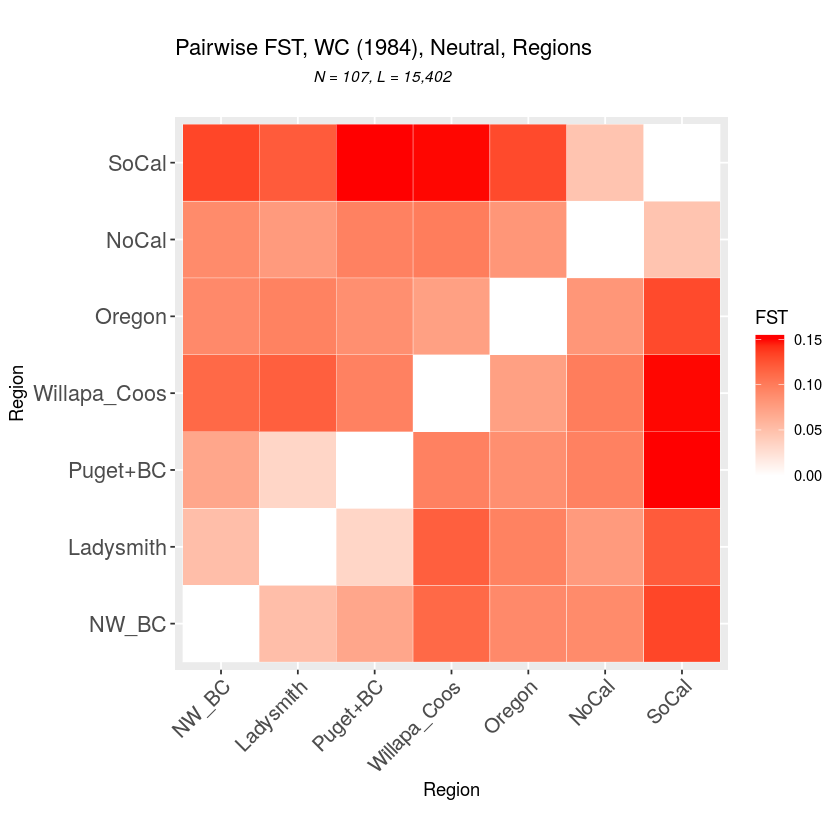

In [179]:
par(mfrow=c(2,1))
ggplot(data = melted, aes(Var2, Var1, fill = value))+ geom_tile(color = "white")+ 
  scale_fill_gradient(low = "white", high = "red", name="FST")  +
  ggtitle(expression(atop("Pairwise FST, WC (1984), Neutral, Regions", atop(italic("N = 107, L = 15,402"), ""))))+
  labs( x = "Region", y = "Region") + 
  theme(axis.text.x = element_text(angle = 45, vjust = 1, size = 12, hjust = 1),axis.text.y = element_text(size = 13)) + 
  coord_fixed()

### Neighbor-joining tree

Running bootstraps:       100 / 100
Calculating bootstrap values... done.


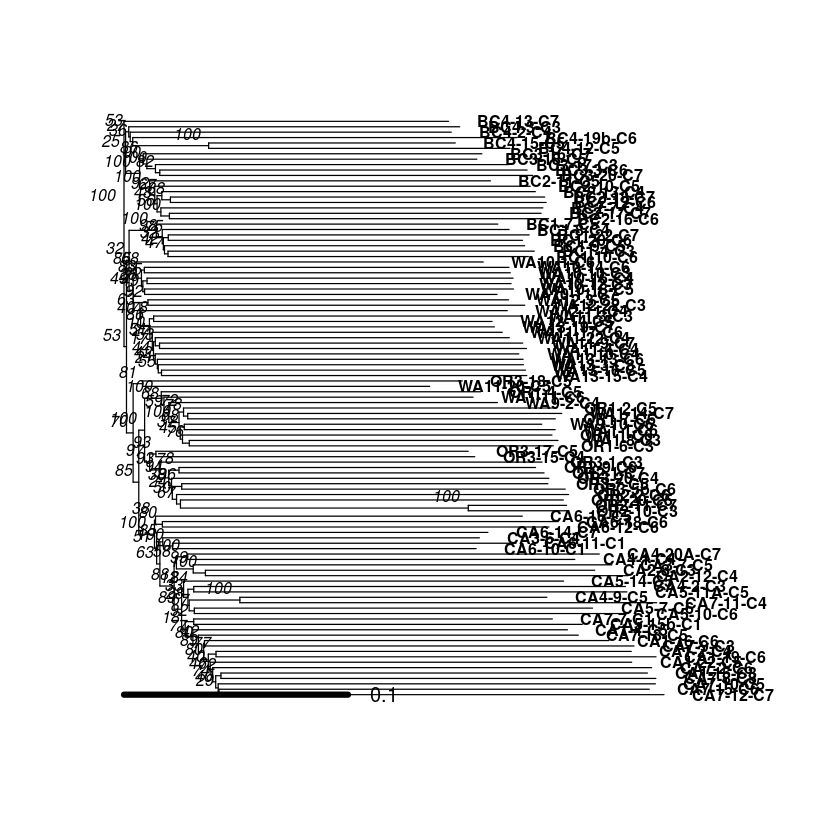

In [119]:
booted_I <- aboot(stratted.filt, tree = "nj", distance = "edwards.dist", showtree = T)

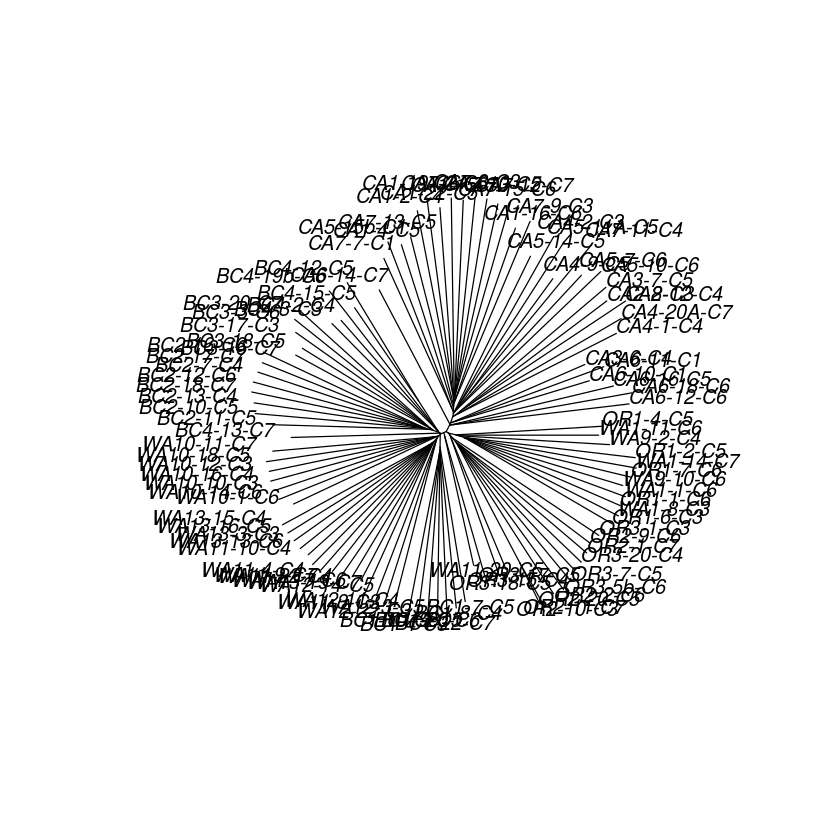

In [120]:
plot(booted_I,"unrooted")

In [117]:
#Using poppr
y <- genind2genpop(stratted.filt)
booted <- aboot(y, tree = "nj", distance = "edwards.dist", showtree = F, sample = 1000)
booted <- root(booted, "San_Diego")


 Converting data from a genind to a genpop object... 

...done.

Running bootstraps:       1000 / 1000
Calculating bootstrap values... done.


In [99]:
booted$tip.label

[1] "Barkeley_Sound" "Coos"           "Discovery_Bay"  "Elkhorn_Slough"
 [5] "Humboldt"       "Klaskino"       "Ladysmith"      "Liberty_Bay"   
 [9] "Mugu_Lagoon"    "Netarts"        "North_Bay"      "San_Diego"     
[13] "San_Francisco"  "Tomales"        "Triton_Cove"    "Victoria"      
[17] "Willapa"        "Yaquina"

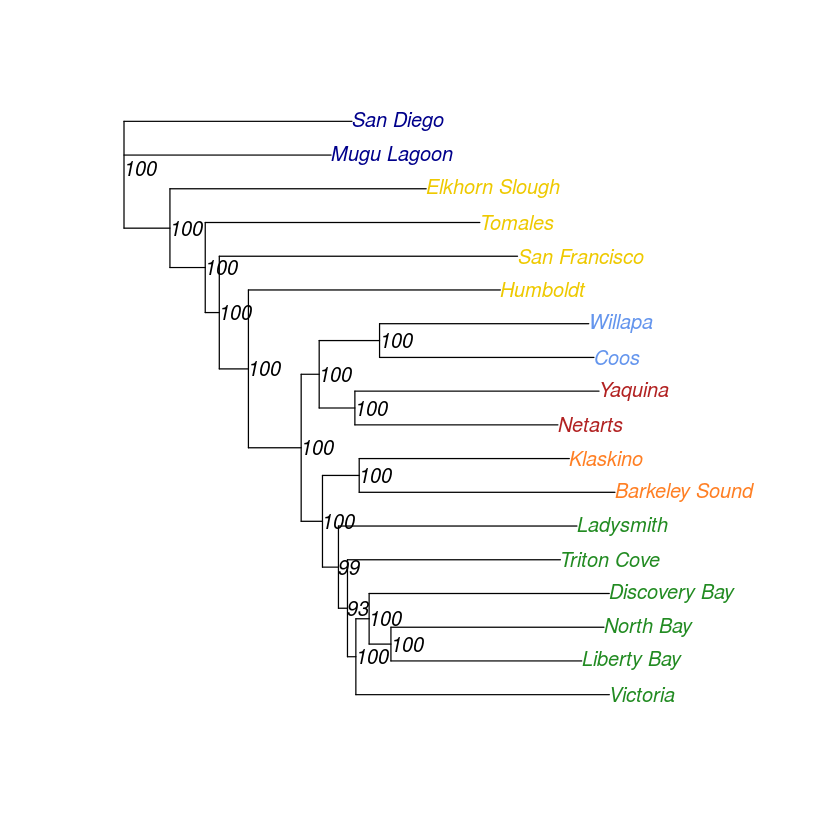

In [100]:
plot(booted,show.node.label = T, tip.color = c("chocolate1","cornflowerblue","forestgreen",rep("gold2",2),
                                               "chocolate1",rep("forestgreen",2),"blue4","firebrick",
                                               "forestgreen","blue4",rep("gold2",2),rep("forestgreen",2),
                                               "cornflowerblue","firebrick"))

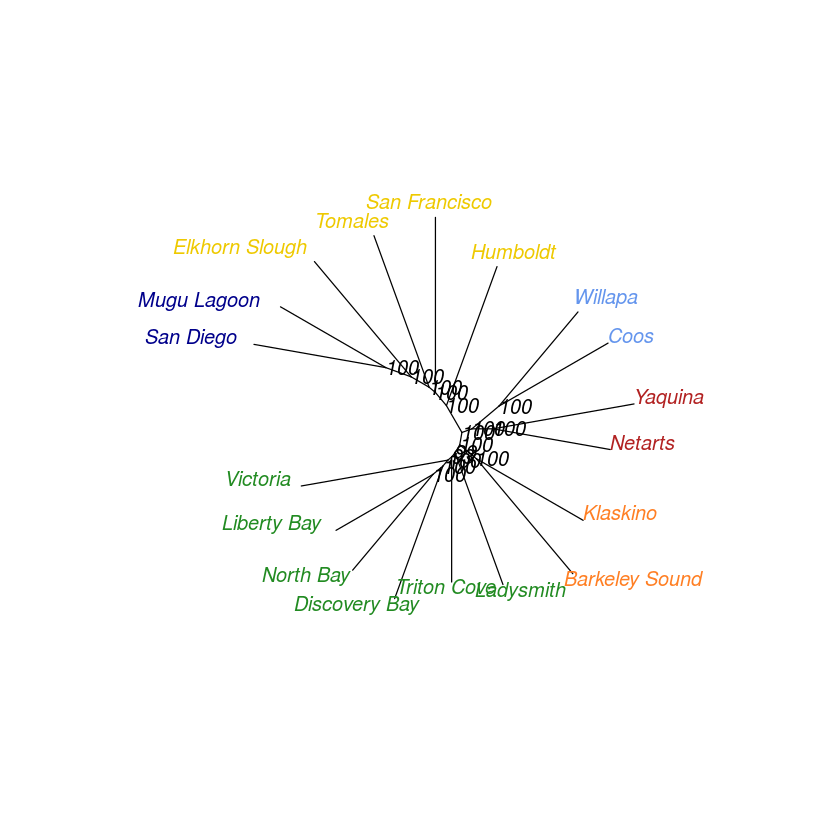

In [101]:
plot(booted,show.node.label = T, "unrooted",tip.color = c("chocolate1","cornflowerblue","forestgreen",rep("gold2",2),
                                               "chocolate1",rep("forestgreen",2),"blue4","firebrick",
                                               "forestgreen","blue4",rep("gold2",2),rep("forestgreen",2),
                                               "cornflowerblue","firebrick"))

In [153]:
#Using Hierfstat
library(ape)
x <- as.matrix(genet.dist(hf.filt))
colnames(x) <- pop_order
rownames(x) <- pop_order
nj <- root(nj(x),"San_Diego")


Attaching package: ‘ape’

The following objects are masked from ‘package:hierfstat’:

    pcoa, varcomp



In [ ]:
nj$tip.label

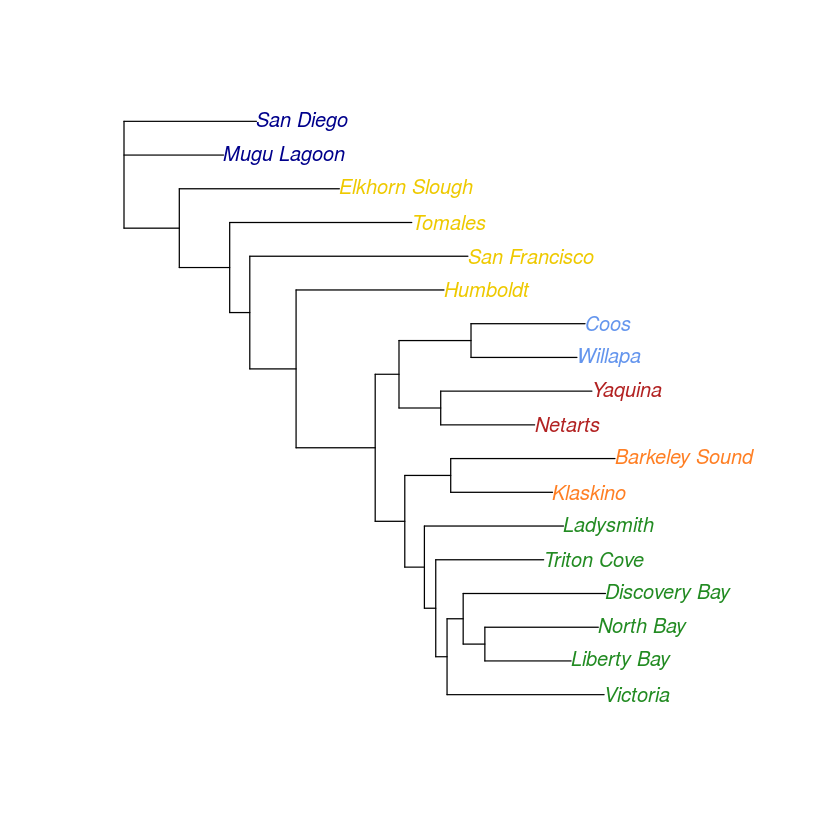

In [98]:
plot(nj, tip.color = c(rep("chocolate1",2),rep("forestgreen",6),"cornflowerblue",rep("firebrick",2),"cornflowerblue",
                       rep("gold2",4),rep("blue4",2)))

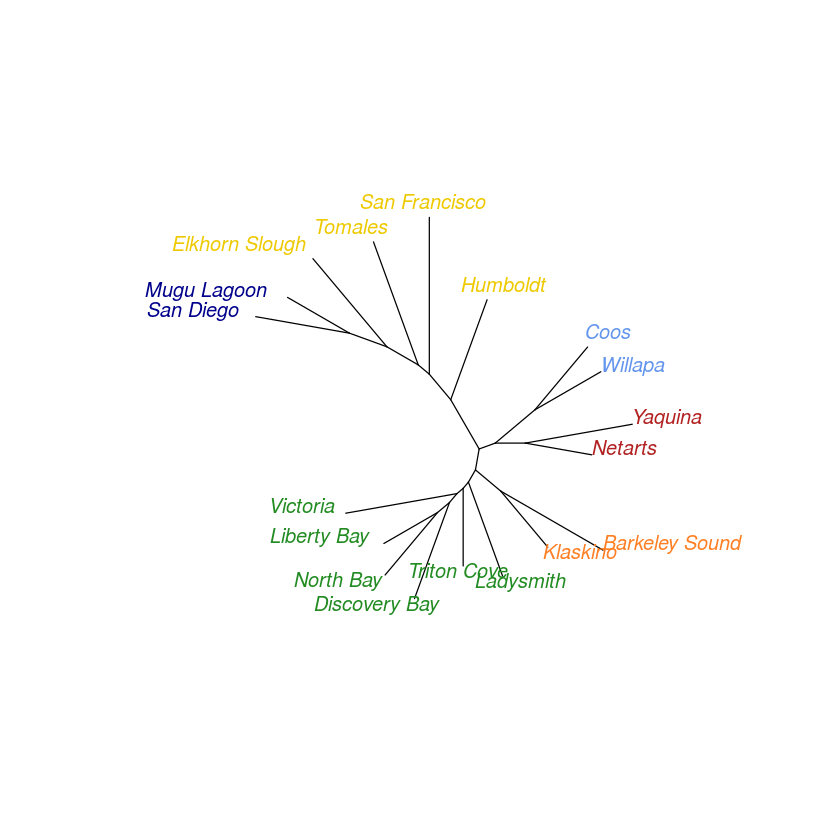

In [154]:
plot(nj, "unrooted", tip.color = c(rep("chocolate1",2),rep("forestgreen",6),"cornflowerblue",rep("firebrick",2),"cornflowerblue",
                       rep("gold2",4),rep("blue4",2)))

### Genetic diversity (observed and expected heterozygosity)

In [60]:
#All populations
comb <- summary(stratted.filt)
names(comb)

[1] "n"         "n.by.pop"  "loc.n.all" "pop.n.all" "NA.perc"   "Hobs"     
[7] "Hexp"

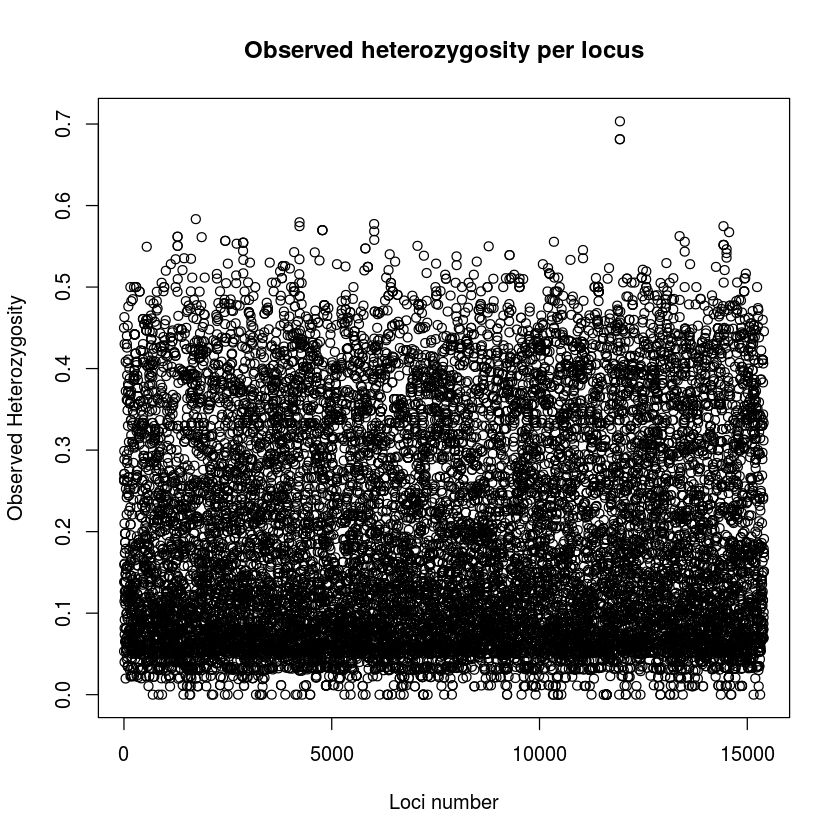

In [58]:
plot(comb$Hobs, xlab="Loci number", ylab="Observed Heterozygosity", 
     main="Observed heterozygosity per locus")

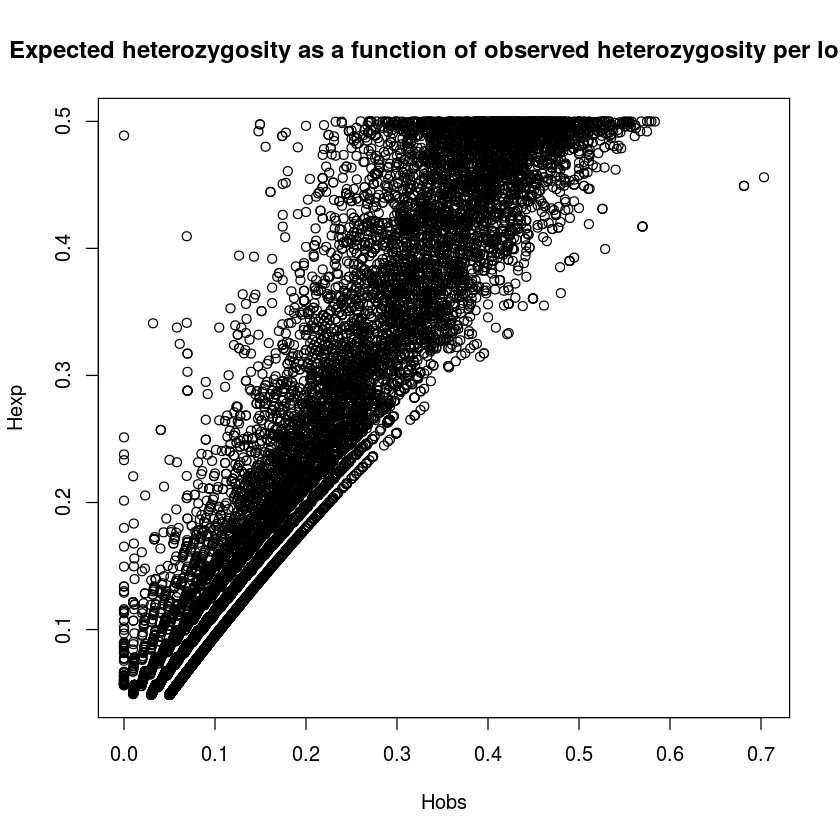

In [62]:
plot(comb$Hobs,comb$Hexp, xlab="Hobs", ylab="Hexp", 
     main="Expected heterozygosity as a function of observed heterozygosity per locus")

In [63]:
bartlett.test(list(comb$Hexp, comb$Hobs)) # a test : H0: Hexp = Hobs


	Bartlett test of homogeneity of variances

data:  list(comb$Hexp, comb$Hobs)
Bartlett's K-squared = 249.05, df = 1, p-value < 2.2e-16


Significant difference between observed and expected heterozygosity

In [79]:
#hw <- hw.test(stratted.filt, B = 200)

In [ ]:
#done = []
#hwe_mat = matrix(nrow = 18,ncol=2)
#i = 1
#for(pop in pop(stratted.filt)){
#    if(pop !%in% done){
#        hwe <- hw.test(stratted.filt[which(pop(stratted.filt)==pop),drop = TRUE],B=500)
#        hwe_mat[2,j] = nrow(hwe[which(hwe[,3]< 0.01),])
#        hwe_mat[1,j] = pop
#        i <- i+ 1
#        done = c(done, pop)
#    }
#}

In [52]:
basicstat <- basic.stats(hf.filt, diploid = TRUE, digits = 3) 

In [65]:
as.data.frame(basicstat$overall)

,basicstat$overall
Ho,0.194
Hs,0.210
Ht,0.233
Dst,0.023
Htp,0.234
Dstp,0.025
Fst,0.100
Fstp,0.105
Fis,0.073
Dest,0.031


In [53]:
boot <- boot.ppfis(hf.filt,nboot = 500)

In [32]:
latitude = c(50.298667,49.01585,49.011383,48.435667,47.9978,47.7375,47.3925,46.6131,46.532386,45.3911556,44.579539,43.3559861,40.8557972,38.117549,37.955067,36.8398194,34.101914,32.602500)

In [ ]:
hf.filt$POP_ID <- mapvalues(hf.filt$POP_ID, from =c(1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18), to = pop_order)

In [56]:
colnames(basicstat$Ho) <- pop_order
Ho <- colMeans(basicstat$Ho,na.rm = T)
He <- colMeans(basicstat$Hs,na.rm = T)
Fis<- colMeans(basicstat$Fis,na.rm = T) 
x <- cbind(Ho,He,Fis,boot$fis.ci,latitude)
x

,Ho,He,Fis,ll,hl,latitude
Klaskino,0.1853911,0.1991972,0.050534029,0.0608,0.0779,50.29867
Barkeley_Sound,0.1758180,0.1911350,0.037001620,0.0671,0.0899,49.01585
Ladysmith,0.1982400,0.1958707,-0.025374243,-0.0229,-0.0009,49.01138
Victoria,0.1723234,0.1829297,0.036194233,0.0477,0.0684,48.43567
Discovery_Bay,0.1798462,0.1937553,0.025281712,0.0572,0.0833,47.99780
Liberty_Bay,0.1787671,0.1872371,0.027074551,0.0355,0.0537,47.73750
North_Bay,0.1752111,0.1864726,0.029126728,0.0491,0.0713,47.39250
Triton_Cove,0.1780340,0.1917234,0.045491358,0.0617,0.0802,46.61310
Willapa,0.1783205,0.1905978,0.034818503,0.0532,0.0737,46.53239
Netarts,0.1904477,0.2069779,0.049734258,0.0700,0.0904,45.39116


In [89]:
summary(Fis)

    Min.  1st Qu.   Median     Mean  3rd Qu.     Max. 
-0.02537  0.02573  0.03609  0.03840  0.05033  0.10359 

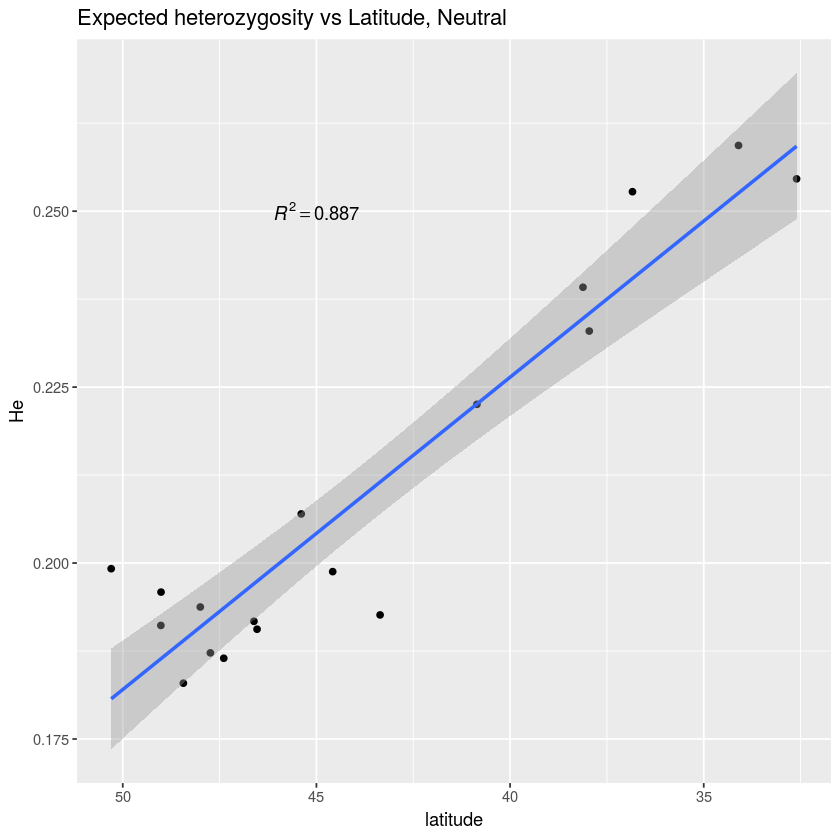

In [76]:
R2 = round(summary(lm(x$He ~ x$latitude))$r.squared, 3)             

ggplot(x, aes(x = latitude, y = He)) + geom_point() + 
geom_smooth(method=lm) + 
ggtitle("Expected heterozygosity vs Latitude, Neutral") +
annotate(geom = "text", label=paste("italic(R^2)==",R2), x=45, y=0.25, parse=T) +
scale_x_reverse()

#### Regions

Significant difference between observed and expected heterozygosity

In [115]:
hw <- hw.test(hf.reg, B = 1000)

ERROR: Error in UseMethod("hw.test"): no applicable method for 'hw.test' applied to an object of class "data.frame"


In [166]:
basicstat <- basic.stats(hf.reg, diploid = TRUE, digits = 3) 

In [167]:
as.data.frame(basicstat$overall)

,basicstat$overall
Ho,0.195
Hs,0.213
Ht,0.233
Dst,0.020
Htp,0.236
Dstp,0.023
Fst,0.085
Fstp,0.098
Fis,0.085
Dest,0.029


In [168]:
boot <- boot.ppfis(hf.reg,nboot = 1000)

In [171]:
nwbc <- hf.filt[which(hf.filt$POP_ID %in% c(1,2)),]
puget <- hf.filt[which(hf.filt$POP_ID %in% c(4,5,6,7,8)),]
willapa <- hf.filt[which(hf.filt$POP_ID %in% c(9,12)),]
oregon <- hf.filt[which(hf.filt$POP_ID %in% c(10,11)),]
Nocal <- hf.filt[which(hf.filt$POP_ID %in% c(13,14,15,16)),]
Socal <- hf.filt[which(hf.filt$POP_ID %in% c(17,18)),]

In [172]:
nwbc <- basic.stats(nwbc, digits = 3)
puget <- basic.stats(puget, digits = 3)
willapa <- basic.stats(willapa, digits = 3)
oregon <- basic.stats(oregon, digits = 3)
Nocal <- basic.stats(Nocal, digits = 3)
Socal <- basic.stats(Socal, digits = 3)

In [173]:
fst <- c(nwbc$overall[7],puget$overall[7],willapa$overall[7],oregon$overall[7],Nocal$overall[7],Socal$overall[7])

In [174]:
Ho <- colMeans(basicstat$Ho,na.rm = T)
He <- colMeans(basicstat$Hs,na.rm = T)
Fis<- colMeans(basicstat$Fis,na.rm = T) 
x <- cbind(Ho,He,Fis, boot$fis.ci)
NS <- c("NW_BC","Puget+BC","Willapa_Coos","Oregon","NoCal","SoCal")
x <- x[NS,]
cbind(x,fst)

,Ho,He,Fis,ll,hl,fst
NW_BC,0.1820695,0.2002019,0.07072686,0.0838,0.0976,0.019
Puget+BC,0.1766680,0.1966867,0.08490901,0.0966,0.1063,0.039
Willapa_Coos,0.1785545,0.1914266,0.05065145,0.0590,0.0750,0.000
Oregon,0.1915910,0.2054345,0.05161739,0.0606,0.0749,0.014
NoCal,0.2159656,0.2431431,0.09460453,0.1061,0.1173,0.025
SoCal,0.2241503,0.2575928,0.10966540,0.1236,0.1362,0.001


## Outlier
Load previously created Adegenet genind objects, made using radiator from a .vcf file.

In [180]:
load("../Inputs/OL-final-c85-t88-Breps-m80x55-maf025-outI2-filt.hf")
load("../Inputs/OL-final-c85-t88-Breps-m80x55-maf025-outI2-filt.genind")

### Pairwise Fst

In [82]:
gindF.fst.mat.tri <- as.matrix(read.table("OL-m80x55-maf025-outI2-Pop.pwfst"))
#gindF.fst.mat.tri[lower.tri(as.dist(gindF.fst.mat.tri), diag=TRUE)] <- NA
melted <- melt(gindF.fst.mat.tri, na.rm =TRUE)

In [67]:
#fst.mat <- pairwise.fst(stratted.filt)
fst.mat.O <- genet.dist(hf.filt, method = "WC84")

In [68]:
gindF.fst.mat.tri <- as.matrix(fst.mat.O)
colnames(gindF.fst.mat.tri) <- pop_order
rownames(gindF.fst.mat.tri) <- pop_order
write.table(gindF.fst.mat.tri, file="OL-m80x55-maf025-outI2-Pop.pwfst",row.names = T,col.names = T)

gindF.fst.mat.tri[lower.tri(fst.mat.O, diag=TRUE)] <- NA
melted <- melt(gindF.fst.mat.tri, na.rm =TRUE)

In [69]:
gindF.fst.mat.tri

,Klaskino,Barkeley_Sound,Ladysmith,Victoria,Discovery_Bay,Liberty_Bay,North_Bay,Triton_Cove,Willapa,Netarts,Yaquina,Coos,Humboldt,Tomales,San_Francisco,Elkhorn_Slough,Mugu_Lagoon,San_Diego
Klaskino,NA,0.06104571,0.16846159,0.5115164,0.3796649,0.33490030,0.37046859,0.23558696,0.5603843,0.4039183,0.472706515,0.46770605,0.5273445,0.5109060,0.5720359,0.5909644,0.6698375,0.70509032
Barkeley_Sound,NA,NA,0.07645964,0.4266570,0.2512186,0.21363918,0.24508959,0.10821129,0.5869215,0.3610738,0.449152284,0.47444936,0.4760434,0.4587072,0.5065246,0.5295577,0.6362105,0.66577564
Ladysmith,NA,NA,NA,0.3310175,0.1607227,0.10267515,0.11846378,0.08175704,0.5787043,0.3701376,0.461550431,0.47701159,0.4826935,0.5115758,0.5494247,0.5732954,0.6681646,0.69710419
Victoria,NA,NA,NA,NA,0.2508618,0.27787564,0.28471774,0.37424892,0.6736667,0.4390382,0.527104143,0.56911521,0.6110600,0.6678443,0.6712236,0.6873084,0.7411575,0.77806680
Discovery_Bay,NA,NA,NA,NA,NA,0.07231707,0.05202087,0.18741010,0.6317949,0.3676520,0.494866357,0.50713597,0.5417184,0.5763242,0.5949930,0.6050913,0.6863570,0.71775464
Liberty_Bay,NA,NA,NA,NA,NA,NA,-0.02182878,0.14625718,0.6320811,0.4144392,0.511971597,0.53432140,0.5525398,0.6102385,0.6228063,0.6382967,0.7105300,0.74340918
North_Bay,NA,NA,NA,NA,NA,NA,NA,0.17935455,0.6602701,0.4267868,0.527247353,0.56170006,0.5512389,0.6146148,0.6158933,0.6342097,0.7081451,0.74112155
Triton_Cove,NA,NA,NA,NA,NA,NA,NA,NA,0.6053473,0.3976953,0.506827007,0.49763851,0.5558254,0.5758140,0.6045089,0.6217303,0.6965100,0.72610977
Willapa,NA,NA,NA,NA,NA,NA,NA,NA,NA,0.1404600,0.234545654,0.09712085,0.5098984,0.5739951,0.5915570,0.6228702,0.7090335,0.74695317
Netarts,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,0.009732775,0.09872889,0.3697093,0.4047305,0.4540195,0.4995665,0.6287917,0.65327824


In [68]:
summary(melted$value)

    Min.  1st Qu.   Median     Mean  3rd Qu.     Max. 
-0.02183  0.36107  0.50714  0.46268  0.61461  0.77807 

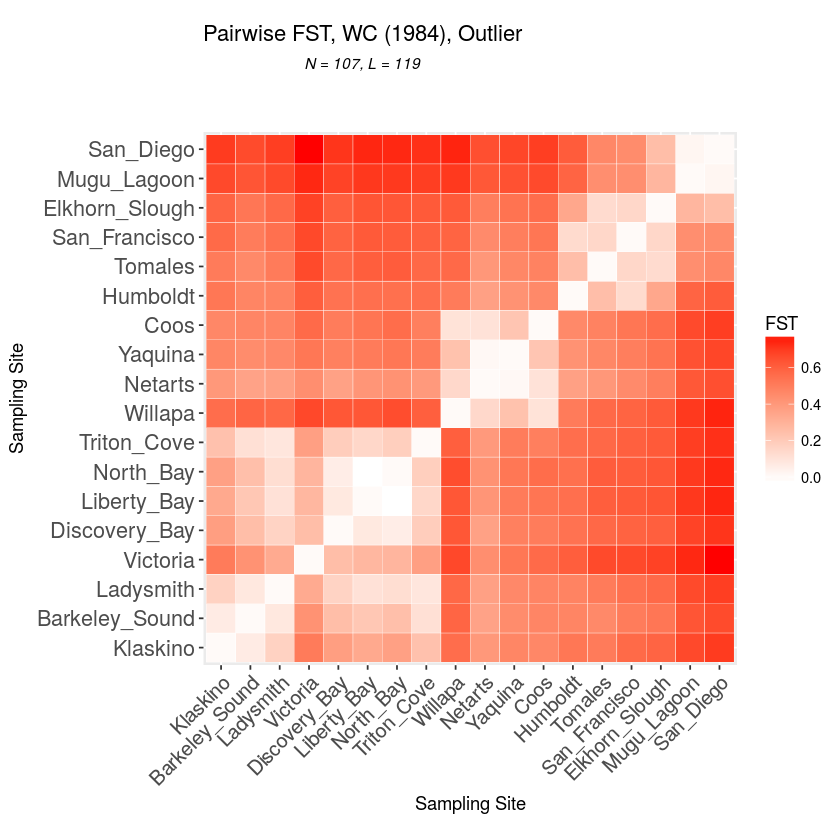

In [83]:
par(mfrow=c(2,1))
ggplot(data = melted, aes(Var2, Var1, fill = value))+ geom_tile(color = "white")+ 
  scale_fill_gradient(low = "white", high = "red", name="FST")  +
  ggtitle(expression(atop("Pairwise FST, WC (1984), Outlier", atop(italic("N = 107, L = 119"), ""))))+
  labs( x = "Sampling Site", y = "Sampling Site") + 
  theme(axis.text.x = element_text(angle = 45, vjust = 1, size = 12, hjust = 1),axis.text.y = element_text(size = 13)) + 
  coord_fixed()

#### Regions

In [182]:
hf.reg <- hf.filt
hf.reg$POP_ID <- mapvalues(hf.reg$POP_ID, from =c(1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18), to = regions)

In [183]:
#fst.mat <- pairwise.fst(stratted.filt)
fst.mat.reg <- genet.dist(hf.reg, method = "WC84")

In [184]:
gindF.fst.mat.tri <- as.matrix(fst.mat.reg)
gindF.fst.mat.tri <- gindF.fst.mat.tri[NS,NS]

In [185]:
write.table(gindF.fst.mat.tri, file="OL-m80x55-maf025-outI2-Reg.pwfst",row.names = T,col.names = T)

#gindF.fst.mat.tri[lower.tri(fst.mat.reg, diag=TRUE)] <- NA
melted <- melt(gindF.fst.mat.tri, na.rm =TRUE)

In [186]:
gindF.fst.mat.tri

,NW_BC,Ladysmith,Puget+BC,Willapa_Coos,Oregon,NoCal,SoCal
NW_BC,0.0000000,0.11986793,0.27944973,0.5077206,0.4163111,0.4241871,0.6634120
Ladysmith,0.1198679,0.00000000,0.08505147,0.5332428,0.4006495,0.3922059,0.6551530
Puget+BC,0.2794497,0.08505147,0.00000000,0.5332374,0.4454986,0.5365481,0.7434108
Willapa_Coos,0.5077206,0.53324276,0.53323743,0.0000000,0.1613576,0.4273718,0.6995118
Oregon,0.4163111,0.40064947,0.44549855,0.1613576,0.0000000,0.3682853,0.6466976
NoCal,0.4241871,0.39220595,0.53654807,0.4273718,0.3682853,0.0000000,0.4033089
SoCal,0.6634120,0.65515297,0.74341085,0.6995118,0.6466976,0.4033089,0.0000000


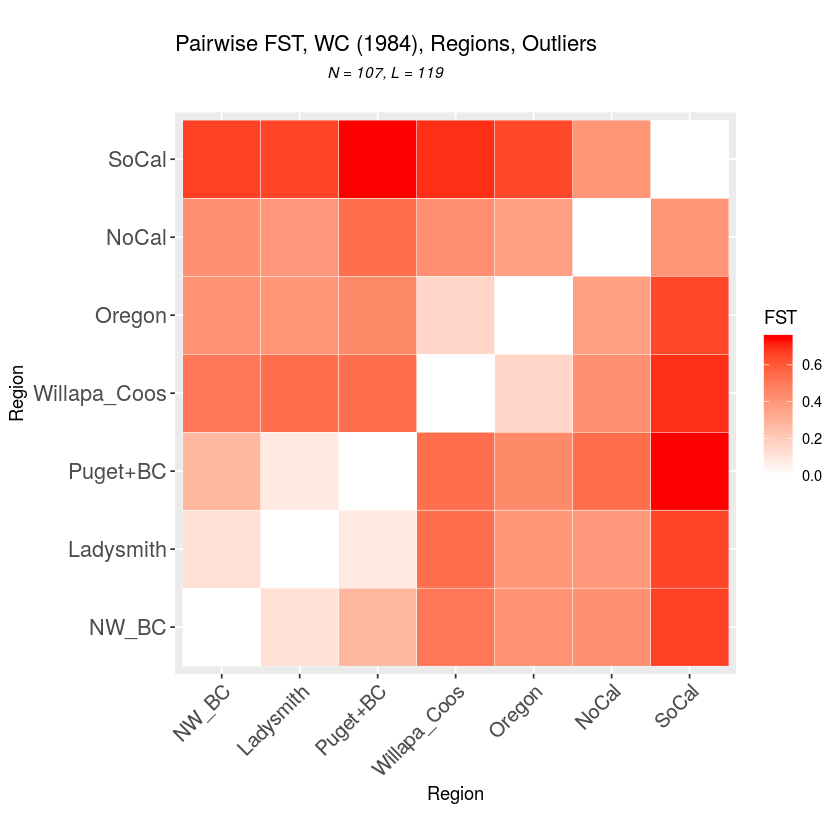

In [187]:
par(mfrow=c(2,1))
ggplot(data = melted, aes(Var2, Var1, fill = value))+ geom_tile(color = "white")+ 
  scale_fill_gradient(low = "white", high = "red", name="FST")  +
  ggtitle(expression(atop("Pairwise FST, WC (1984), Regions, Outliers", atop(italic("N = 107, L = 119"), ""))))+
  labs( x = "Region", y = "Region") + 
  theme(axis.text.x = element_text(angle = 45, vjust = 1, size = 12, hjust = 1),axis.text.y = element_text(size = 13)) + 
  coord_fixed()

### Neighbor-joining tree

In [112]:
#Using poppr
y <- genind2genpop(stratted.filt)
booted <- aboot(y, tree = "nj", distance = "edwards.dist", showtree = F,sample = 1000)
booted <- root(booted, "San_Diego")


 Converting data from a genind to a genpop object... 

...done.

Running bootstraps:       1000 / 1000
Calculating bootstrap values... done.


In [104]:
booted$tip.label

[1] "Barkeley_Sound" "Coos"           "Discovery_Bay"  "Elkhorn_Slough"
 [5] "Humboldt"       "Klaskino"       "Ladysmith"      "Liberty_Bay"   
 [9] "Mugu_Lagoon"    "Netarts"        "North_Bay"      "San_Diego"     
[13] "San_Francisco"  "Tomales"        "Triton_Cove"    "Victoria"      
[17] "Willapa"        "Yaquina"

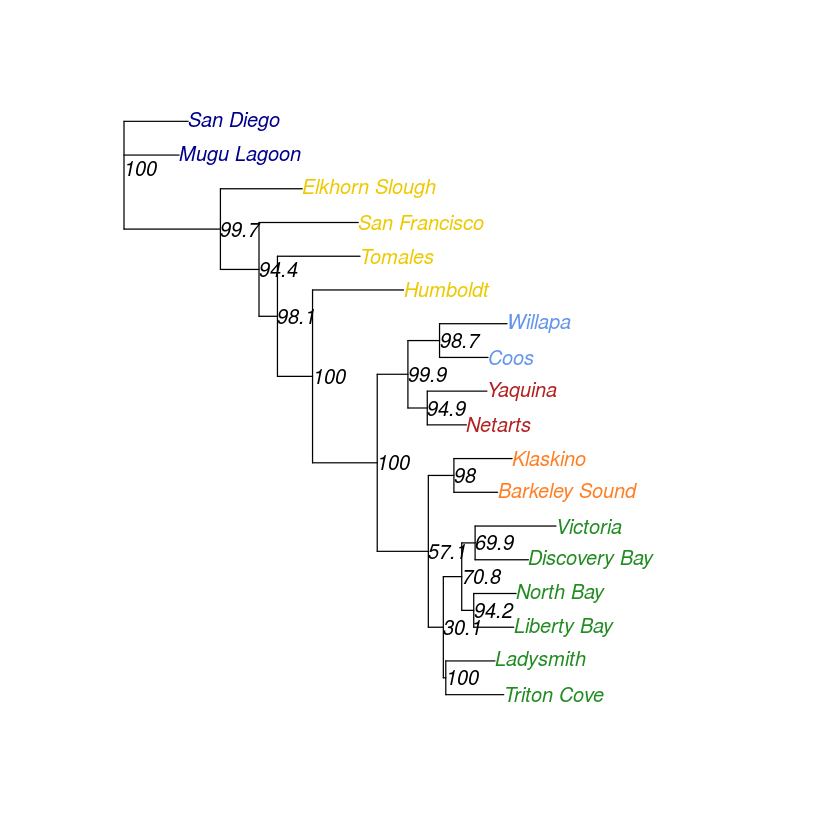

In [113]:
plot(booted,show.node.label = T, tip.color = c("chocolate1","cornflowerblue","forestgreen",rep("gold2",2),
                                               "chocolate1",rep("forestgreen",2),"blue4","firebrick",
                                               "forestgreen","blue4",rep("gold2",2),rep("forestgreen",2),
                                               "cornflowerblue","firebrick"))

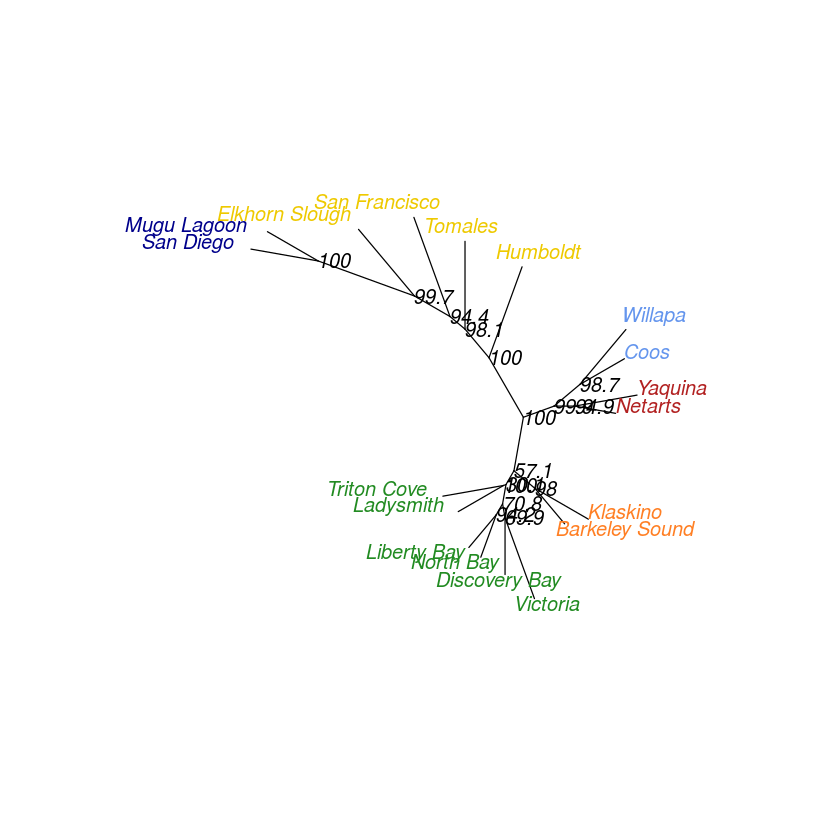

In [114]:
plot(booted,show.node.label = T, "unrooted",tip.color = c("chocolate1","cornflowerblue","forestgreen",rep("gold2",2),
                                               "chocolate1",rep("forestgreen",2),"blue4","firebrick",
                                               "forestgreen","blue4",rep("gold2",2),rep("forestgreen",2),
                                               "cornflowerblue","firebrick"))

In [115]:
#Using Hierfstat
x <- as.matrix(genet.dist(hf.filt))
colnames(x) <- pop_order
rownames(x) <- pop_order
nj <- root(nj(x),"San_Diego")

In [110]:
nj$tip.label

[1] "Klaskino"       "Barkeley_Sound" "Ladysmith"      "Victoria"      
 [5] "Discovery_Bay"  "Liberty_Bay"    "North_Bay"      "Triton_Cove"   
 [9] "Willapa"        "Netarts"        "Yaquina"        "Coos"          
[13] "Humboldt"       "Tomales"        "San_Francisco"  "Elkhorn_Slough"
[17] "Mugu_Lagoon"    "San_Diego"

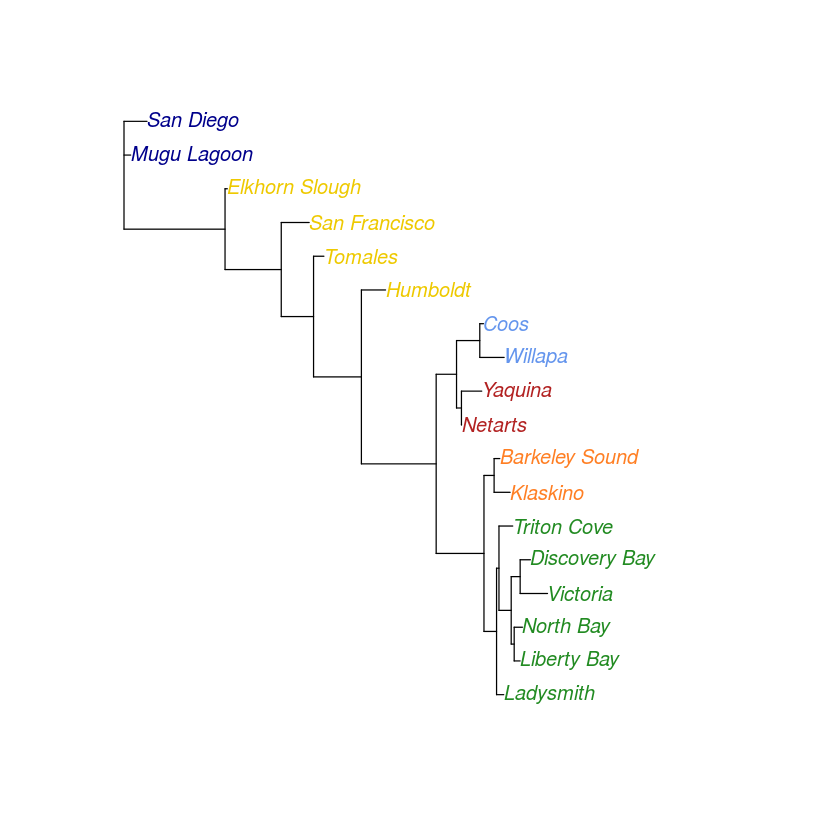

In [116]:
plot(nj, tip.color = c(rep("chocolate1",2),rep("forestgreen",6),"cornflowerblue",rep("firebrick",2),"cornflowerblue",
                       rep("gold2",4),rep("blue4",2)))

### Genetic diversity (observed and expected heterozygosity)

In [82]:
#All populations
comb <- summary(stratted.filt)
names(comb)

[1] "n"         "n.by.pop"  "loc.n.all" "pop.n.all" "NA.perc"   "Hobs"     
[7] "Hexp"

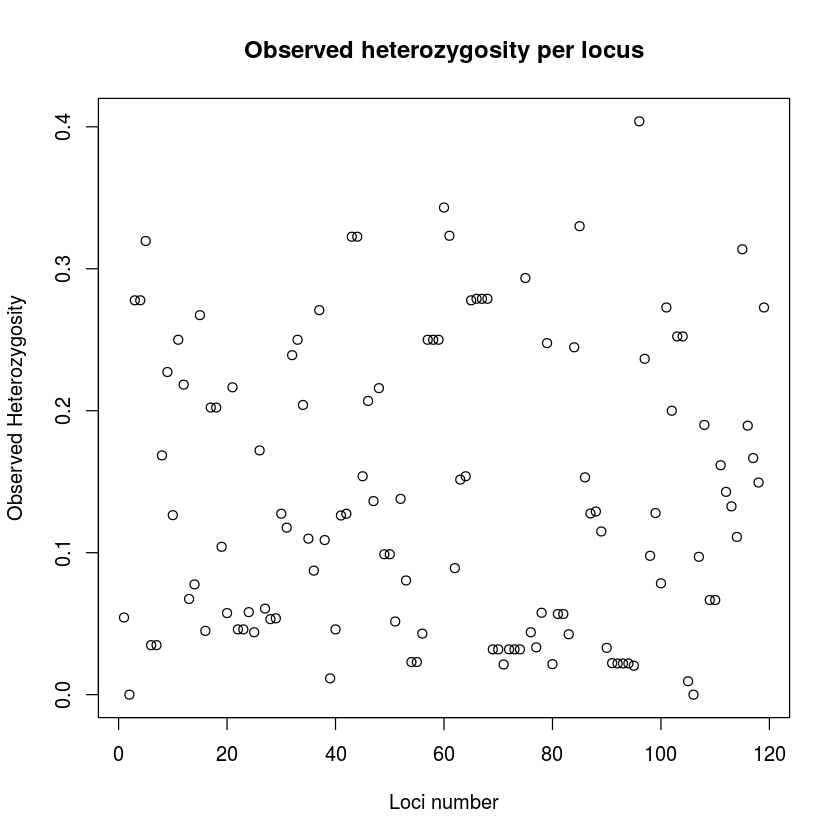

In [83]:
plot(comb$Hobs, xlab="Loci number", ylab="Observed Heterozygosity", 
     main="Observed heterozygosity per locus")

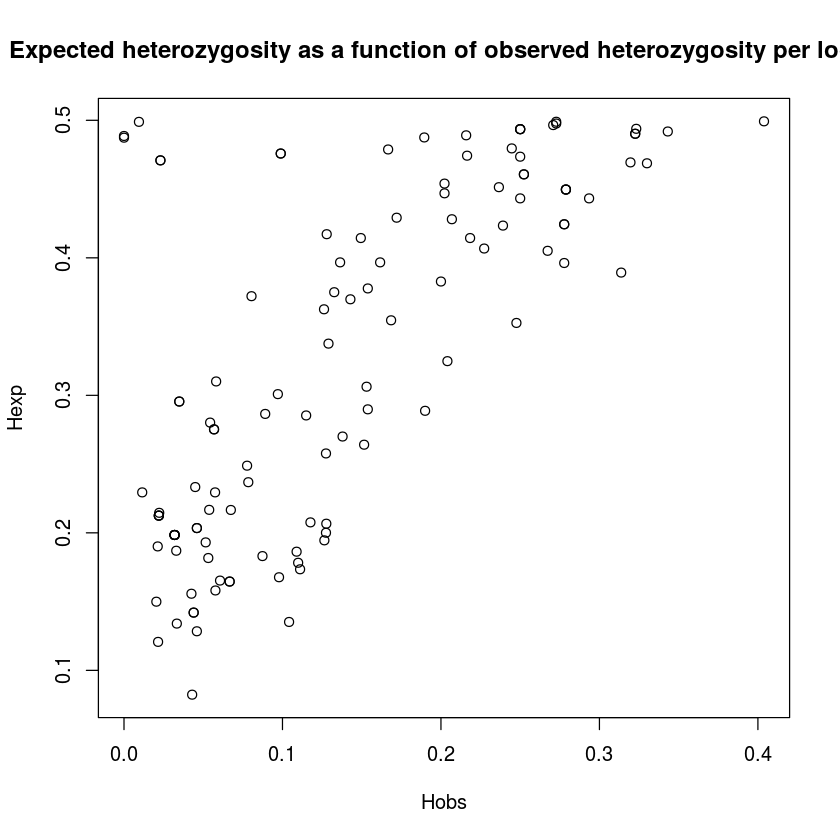

In [84]:
plot(comb$Hobs,comb$Hexp, xlab="Hobs", ylab="Hexp", 
     main="Expected heterozygosity as a function of observed heterozygosity per locus")

In [85]:
bartlett.test(list(comb$Hexp, comb$Hobs)) # a test : H0: Hexp = Hobs


	Bartlett test of homogeneity of variances

data:  list(comb$Hexp, comb$Hobs)
Bartlett's K-squared = 6.3079, df = 1, p-value = 0.01202


Significant difference between observed and expected heterozygosity

In [79]:
hw <- hw.test(stratted.filt, B = 200)

In [ ]:
done = []
hwe_mat = matrix(nrow = 18,ncol=2)
i = 1
for(pop in pop(stratted.filt)){
    if(pop !%in% done){
        hwe <- hw.test(stratted.filt[which(pop(stratted.filt)==pop),drop = TRUE],B=500)
        hwe_mat[2,j] = nrow(hwe[which(hwe[,3]< 0.01),])
        hwe_mat[1,j] = pop
        i <- i+ 1
        done = c(done, pop)
    }
}

In [78]:
basicstat <- basic.stats(hf.filt, diploid = TRUE, digits = 3) 

In [70]:
as.data.frame(basicstat$overall)

,basicstat$overall
Ho,0.147
Hs,0.162
Ht,0.334
Dst,0.171
Htp,0.344
Dstp,0.182
Fst,0.514
Fstp,0.528
Fis,0.093
Dest,0.217


In [79]:
boot <- boot.ppfis(hf.filt,nboot = 1000)

In [81]:
colnames(basicstat$Ho) <- pop_order
Ho <- colMeans(basicstat$Ho,na.rm = T)
He <- colMeans(basicstat$Hs,na.rm = T)
Fis<- colMeans(basicstat$Fis,na.rm = T) 
x <- cbind(Ho,He,Fis,boot$fis.ci,latitude)
x

,Ho,He,Fis,ll,hl,latitude
Klaskino,0.10655462,0.12480672,0.103609756,0.0235,0.2831,50.29867
Barkeley_Sound,0.13444538,0.15070588,0.087650000,-0.0801,0.2940,49.01585
Ladysmith,0.16569748,0.13700000,-0.188878049,-0.3570,-0.0502,49.01138
Victoria,0.07553782,0.07060504,-0.050300000,-0.1684,0.0410,48.43567
Discovery_Bay,0.12673109,0.10152101,-0.189636364,-0.4567,-0.0463,47.99780
Liberty_Bay,0.08958824,0.10370588,0.122756757,-0.0334,0.3050,47.73750
North_Bay,0.08445378,0.09411765,0.049457143,-0.0314,0.2479,47.39250
Triton_Cove,0.10792437,0.11239496,0.004828571,-0.1331,0.2118,46.61310
Willapa,0.04916807,0.08068067,0.287730769,0.2390,0.5270,46.53239
Netarts,0.16443697,0.18944538,0.114368421,0.0022,0.2473,45.39116


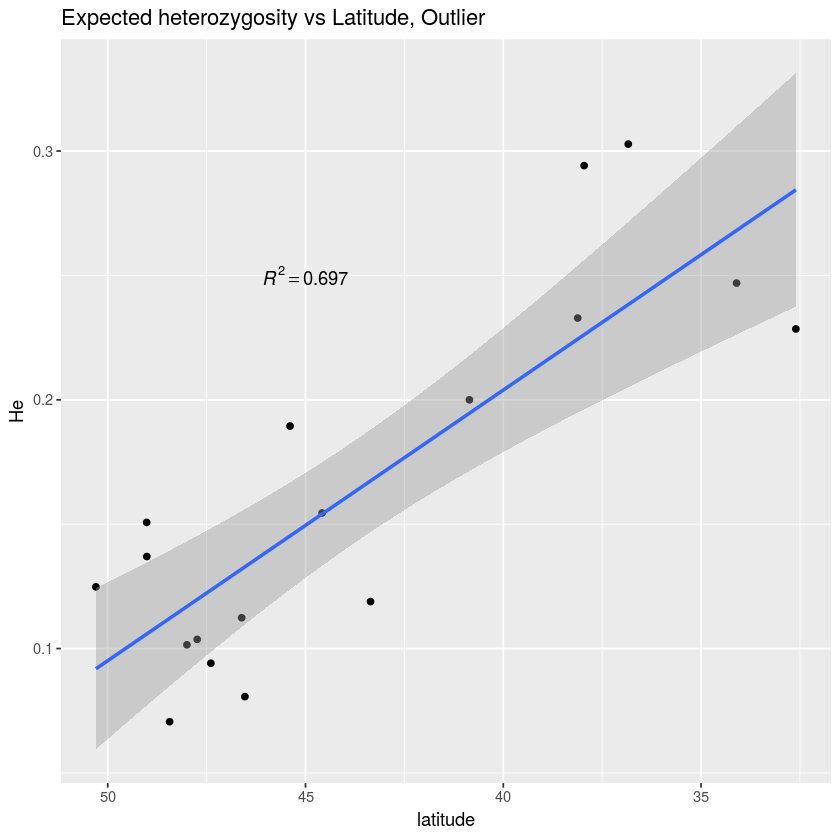

In [82]:
R2 = round(summary(lm(x$He ~ x$latitude))$r.squared, 3)             

ggplot(x, aes(x = latitude, y = He)) + geom_point() + 
geom_smooth(method=lm) + 
ggtitle("Expected heterozygosity vs Latitude, Outlier") +
annotate(geom = "text", label=paste("italic(R^2)==",R2), x=45, y=0.25, parse=T) +
scale_x_reverse()

In [73]:
summary(Fis)

    Min.  1st Qu.   Median     Mean  3rd Qu.     Max. 
-0.18964  0.01199  0.08266  0.05800  0.11168  0.28773 

#### Regions

Significant difference between observed and expected heterozygosity

In [115]:
hw <- hw.test(hf.reg, B = 1000)

ERROR: Error in UseMethod("hw.test"): no applicable method for 'hw.test' applied to an object of class "data.frame"


In [160]:
basicstat_o <- basic.stats(hf.reg, diploid = TRUE, digits = 2) 

In [90]:
as.data.frame(basicstat$overall)

,basicstat$overall
Ho,0.15
Hs,0.18
Ht,0.34
Dst,0.15
Htp,0.37
Dstp,0.18
Fst,0.45
Fstp,0.50
Fis,0.21
Dest,0.22


In [157]:
nwbc <- hf.filt[which(hf.filt$POP_ID %in% c(1,2)),]
puget <- hf.filt[which(hf.filt$POP_ID %in% c(3,4,5,6,7,8)),]
willapa <- hf.filt[which(hf.filt$POP_ID %in% c(9,12)),]
oregon <- hf.filt[which(hf.filt$POP_ID %in% c(10,11)),]
Nocal <- hf.filt[which(hf.filt$POP_ID %in% c(13,14,15,16)),]
Socal <- hf.filt[which(hf.filt$POP_ID %in% c(17,18)),]

In [158]:
nwbc <- basic.stats(nwbc, digits = 3)
puget <- basic.stats(puget, digits = 3)
willapa <- basic.stats(willapa, digits = 3)
oregon <- basic.stats(oregon, digits = 3)
Nocal <- basic.stats(Nocal, digits = 3)
Socal <- basic.stats(Socal, digits = 3)

In [159]:
fst_o <- c(nwbc$overall[7],puget$overall[7],willapa$overall[7],oregon$overall[7],Nocal$overall[7],Socal$overall[7])

In [161]:
boot <- boot.ppfis(hf.reg,nboot = 1000)

In [162]:
Ho <- colMeans(basicstat_o$Ho,na.rm = T)
He <- colMeans(basicstat_o$Hs,na.rm = T)
Fis<- colMeans(basicstat_o$Fis,na.rm = T) 
x <- cbind(Ho,He,Fis, boot$fis.ci)
NS <- c("NW_BC","Puget+BC","Willapa_Coos","Oregon","NoCal","SoCal")
x <- x[NS,]
cbind(x,fst_o)

,Ho,He,Fis,ll,hl,fst_o
NW_BC,0.11680672,0.1372269,0.11959184,0.0464,0.2625,0.028
Puget+BC,0.10420168,0.1211765,0.13125000,0.0381,0.2315,0.153
Willapa_Coos,0.06798319,0.1040336,0.24487179,0.2044,0.4754,0.049
Oregon,0.15588235,0.1725210,0.09451613,-0.0169,0.2141,0.005
NoCal,0.22991597,0.3057983,0.21621359,0.1942,0.3095,0.153
SoCal,0.18731092,0.2431092,0.19806818,0.1593,0.3011,0.010
